# Pizza Dataset

In [180]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./pizzeria_tania_data_simplified.csv")

Dataset contains real orders history of one polish pizza restaurant.
14773 orders between 2016-10-11 12:00 and 2018-06-19 14:00.

In [3]:
df

,count,year,month,day,hour,working_day,weekend_day,public_holiday
0,5,2016,10,11,12,1,0,0
1,1,2016,10,11,13,1,0,0
2,1,2016,10,11,14,1,0,0
3,0,2016,10,11,15,1,0,0
4,0,2016,10,11,16,1,0,0
...,...,...,...,...,...,...,...,...
14767,0,2018,6,19,10,1,0,0
14768,1,2018,6,19,11,1,0,0
14769,13,2018,6,19,12,1,0,0
14770,7,2018,6,19,13,1,0,0


In [4]:
df.describe().round(3)

,count,year,month,day,hour,working_day,weekend_day,public_holiday
count,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000
mean,4.256,2017.143,6.258,15.704,11.500,0.687,0.286,0.040
std,5.968,0.622,3.658,8.739,6.922,0.464,0.452,0.197
min,0.000,2016.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,0.000,2017.000,3.000,8.000,5.750,0.000,0.000,0.000
50%,0.000,2017.000,6.000,16.000,12.000,1.000,0.000,0.000
75%,8.000,2018.000,10.000,23.000,17.000,1.000,1.000,0.000
max,35.000,2018.000,12.000,31.000,23.000,1.000,1.000,1.000


Aus dieser Tabelle gehen relativ wenig Informationen hervor , schafft aber einen kleinen Überblick über die Daten.


# Fragen auf die der Datensatz antworten liefern könnte: 


# Stunden:
Welche Stunden sind am profitabelsten?<br>
Wie viele Pizzen wurden durschnittlich in der ersten und letzten Stunde des Tages verkauft ? Lohnt sich diese Stunde?<br>
Lohnt es sich eine Mittagspause zu machen? <br>
Sind diese Werte an Wochenenden/Feiertagen anders?

# Tage:
Welche Tage sind am profitabelsten?<br>
Welcher Tag bietet sich als Ruhetag an?<br>

# Monate:
Welche Monate sind am profitabelsten? <br>
Sind manche Monate besonders schwach? Wieso könnte das so sein?<br>
Wie viele Pizzen werden pro Monat verkauft?

# Entwicklung über die Zeit:
Wie ist die Entwicklung über die Zeit? Lässt sich ein Trend abbilden oder eine Prognose machen?

# Art des Tages:
Gibt es einen signifikanten Unterschied zwischen Werk- und Wochenendtagen?<br>

# Was bringen einem diese Daten:
Im Sinne von Marketing-Aktionen?<br>
Oder langfristiger Existenz?<br>
Oder Personal- und Ressourcenplanung?<br>
Oder Öffnungs und Urlaubszeiten?



# Data-prepping

In [5]:
daylist= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [6]:
i = 1
h = 12 
append_daylist = []
for _ in range(len(df.index)):
    append_daylist.append(daylist[i %7])
    h = h +1 
    if h%24 ==0:
        i= i+1

In [7]:
df['dayname'] = append_daylist

In [8]:
daily_sum = df.groupby(['year','month','day']).sum()
x=df # copy for manipulation purposes
x=x.drop(x[(x['month'] == 10) & (x['year'] == 2016)].index)
x=x.drop(x[(x['month'] == 6) & (x['year'] == 2018)].index)
monthly_sum = x.groupby(['year','month']).sum()

In [9]:
daily_sum_gb = df.groupby(['dayname'])

In [10]:
daily_agg= daily_sum_gb.agg({
    'count' : ['sum' , 'mean']
})

In [11]:
daily_agg=daily_agg.reindex(daylist)

In [12]:
hours_gb = df.groupby(['hour'])

In [13]:
hours_agg= hours_gb.agg({
    'count' : ['sum' , 'mean']
})

In [14]:
daytype_gb = df.groupby(['working_day'])

In [15]:
daytype_agg= daytype_gb.agg({
    'count' : ['sum' , 'mean']
})

# Zusammenfassung 

Der Datensatz wurde in verschieden Formen gebracht. Ebenfalls wurde der Datensatz um eine Spalte mit dem Namen des Tages erweitert. Wir haben nun:<br>
dayly und monthly_sum sind aggregierte Datensätze, die die Summe über die jeweiligen Perioden angibt.<br>
dayly_agg groupiert die Daten nach den verschiedenen Tagen. (sum und mean)<br>
hours_agg groupiert die Daten nach den verschiedenen Stunden des Tages.(sum und mean) <br>
daytype_agg unterscheidet nach Werktagen (=1) und Wochenendtagen(=0)


# Korrealationsmatrix 
Die Korrealationsmatrix kann einen guten Überblick darüber geben, welche Größen von einander abhängen und erneut neue Hinweise auf mögliche Fragestellungen geben.

In [16]:
df_corr= df.corr().round(2)

<AxesSubplot:>

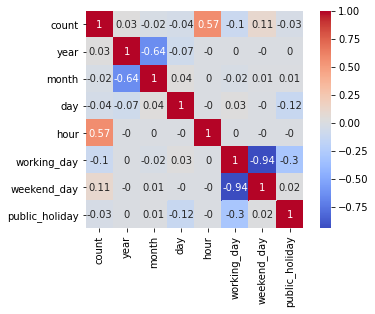

In [17]:
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns,
        annot = True,
        cmap = 'coolwarm',
        square = True)

# Auswertung

Scheinbar haben der Tag , Monat oder Jahr des Datums keinen wirklichen Einfluss auf die Daten. Vor allem der Parameter Hour scheint die Verkaufszahlen zu beeinflussen. Ebenfalls gibt es auch nooch Unterschiede zwischen Werktagen und Wochenendtagen.
Um diese Annahmen zu Bestätigen, lohnt es sich die Daten erstmal zu Visualisieren

<AxesSubplot:xlabel='dayname'>

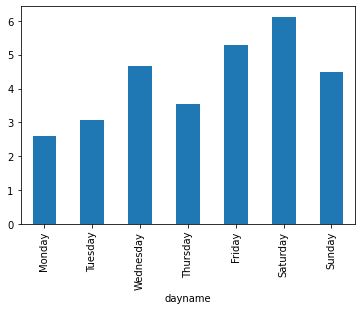

In [18]:
daily_agg[('count', 'mean')].plot(kind='bar')

Man sieht, dass der Wert aus der Korrealationsmatrix nicht gestimmt hat. Da Der Datensatz sehr fein strukturiert ist, scheint der Tag keinen großen Einfluss auf den Verkauf zu haben.<br>
Visualisiert man jedoch die groupierten Daten, sieht man, dass die Mittwoch, Freitag und Samstag die höchsten Durschnittswerte aufweißt.<br> 
Warum der Mittwoch von den Wochentagen heraussticht, ist aus den Daten nicht zu erkennen. Dazu fehlen Daten über das Unternehmen (Öffnungszeiten , Aktionen , etc.)


# Einfluss des Arbeitstages

<AxesSubplot:xlabel='working_day'>

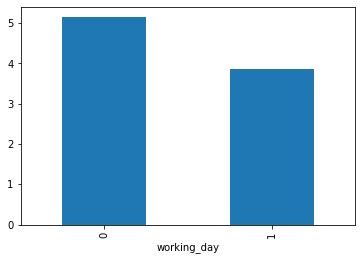

In [19]:
daytype_agg[('count', 'mean')].plot(kind='bar')

Der stündliche Durschnittsverkauf ist an Wochenendtagen höher.

# Einfluss des Monats 

<AxesSubplot:xlabel='year,month'>

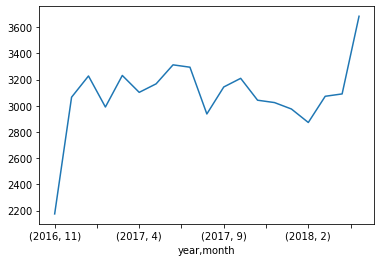

In [20]:
monthly_sum['count'].plot()

In [21]:
monthly_sum['count'].describe().round(2)

count      19.00
mean     3084.68
std       283.29
min      2174.00
25%      3007.00
50%      3090.00
75%      3218.00
max      3683.00
Name: count, dtype: float64

<AxesSubplot:>

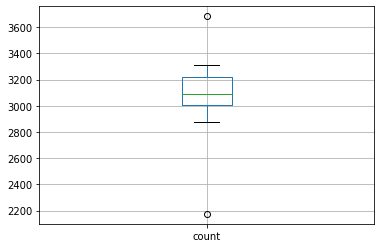

In [22]:
monthly_sum.boxplot(column = 'count')

<AxesSubplot:ylabel='Frequency'>

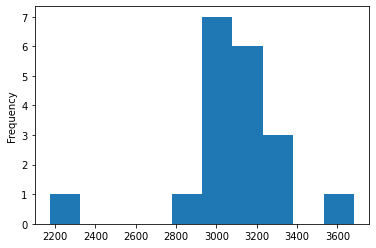

In [23]:
monthly_sum['count'].plot(kind= 'hist', bins=10)

Bis auf zwei "Ausreißer" befinden sich die restlichen Daten zentriert um den Mittelwert.
Abweichungen sind jedoch "normal" bei monatlichen Daten, allein aufgrund der unterschiedlichen Längen.

# Einfluss der Tageszeit

<AxesSubplot:xlabel='hour'>

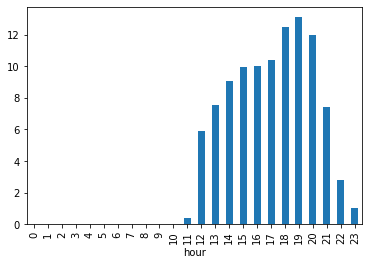

In [24]:
hours_agg[('count', 'mean')].plot(kind='bar')

In [25]:
hours_agg.round(3)

count        
       sum    mean
hour              
0        7   0.011
1        0   0.000
2        0   0.000
3        0   0.000
4        0   0.000
5        0   0.000
6        0   0.000
7        0   0.000
8        0   0.000
9        3   0.005
10       9   0.015
11     235   0.383
12    3618   5.873
13    4651   7.550
14    5584   9.080
15    6142   9.971
16    6166  10.010
17    6419  10.420
18    7681  12.469
19    8088  13.130
20    7354  11.958
21    4562   7.430
22    1710   2.780
23     639   1.037

Man sieht klar, dass es eine starke Abhängigkeit zwischen den Verkaufszahlen und der Tageszeit gibt.<br>
Vor allem zwischen 18 und 21 Uhr wurden die drei höchsten Durschnittswerte verzeichnet.<br>
Fraglich ist nur ob die Öffnungszeiten: 0-1 Uhr und 9-11 Uhr Sinn machen. Über die Betrachtungszeit von 617 Tagen wurden nur 19 Pizzen in diesen Zeiten verkauft.

# Stündliche Verkaufszahl vorraussagen:


In [142]:
le = LabelEncoder()
day_labels = le.fit_transform(df['dayname'])
day_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df['day_id'] = day_labels

In [143]:
mlr_df=df.query('count > 0')

In [149]:
X = mlr_df[['hour','day_id','working_day','weekend_day', 'year']]
Y = mlr_df['count']
X_train,X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 0)

In [150]:
MLR = LinearRegression()
MLR.fit(X_train,Y_train)

LinearRegression()

In [151]:
Y_predict = MLR.predict(X_test)
val = pd.DataFrame()
val['Y_test'] = Y_test
val['Y_predict'] = Y_predict
val.head(20)

,Y_test,Y_predict
2804,17,11.747570
7264,7,7.819606
4801,7,13.354525
8396,6,8.837704
12696,10,13.237130
8612,16,8.774171
3530,4,9.792269
13007,2,9.834491
7488,10,13.115884
10094,5,7.708030


Es sieht nicht so aus als ließe sich die Stündliche Verkaufszahl vorraussagen.<br>
Anhand eines Beispiels zeig ich, dass dies aber aufgrund von hoher varianz sehr schwer ist 

In [152]:
df.query('hour == 17')['count'].describe().round(2)

count    616.00
mean      10.42
std        4.49
min        0.00
25%        7.75
50%       10.00
75%       13.00
max       26.00
Name: count, dtype: float64

# Zukünftige Entwicklung ? 

Wir unterstellen der Entwicklung der Verkäufe nun ein leichtes lineares Wachstum.<br>
Daher führen wir eine Regression anhand der Tage durch, an denen Pizzen verkauft wurden. <br>

In [167]:
opened=daily_sum.query('count > 0')

<AxesSubplot:xlabel='year,month,day'>

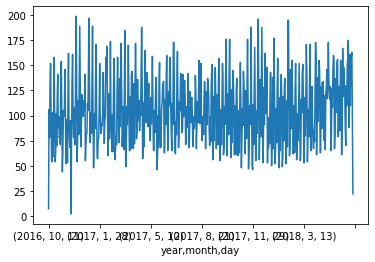

In [168]:
daily_sum.query('count > 0')['count'].plot()

In [171]:
model = LinearRegression()
y = opened['count'] 
x= list(range(0,len(opened.index)))
x=np.reshape(x, (-1, 1))
model.fit(x,y)
inter=model.intercept_.round(2)
coef=float(model.coef_.round(2))

In [172]:
inter

100.56

In [175]:
coef *365

7.3

Die Lineare Regression über die täglichen Daten bestimmt einen Koeffizienten von 7.3 .<br>
Das bedeutet, dass die Pizzeria jedes Jahr 7.3 Pizzen pro Tag mehr Verkauft. Dies beweist, dass sich die umgesetzte Menge kontinuierlich erhöht.<br>
Das Model sagt für 1 Jahr nach Ende der Aufzeichnung folgenden Wert vorraus:

In [176]:
round(float(model.predict([[len(daily_sum.index)+365 ]])),2)

116.81

In [178]:
yp=model.predict(x)

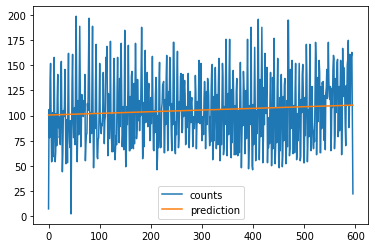

In [181]:
plt.plot(x,y, label='counts')
plt.plot(x,yp, label='prediction')
plt.legend(loc='best')
plt.show()

Man sieht auch hier wieder, dass das Modell schlecht dazu benutzt werden kann um tägliche Wertevorher zu sagen.<br>
Jedoch kann man erkennen, dass die Entwicklung, wie schon bereits erwähnt, an sich positiv verläuft.